In [9]:
library(ggplot2)
results = read.csv("data.csv")
df = aggregate( time ~ size:method, data=results, FUN=mean)
df$sd = aggregate( time ~ size:method, data=results, FUN=sd)$time

In [10]:
naive = df[df$method==" naive",]
better = df[df$method==" better",]
blas = df[df$method==" gsl-blas",]

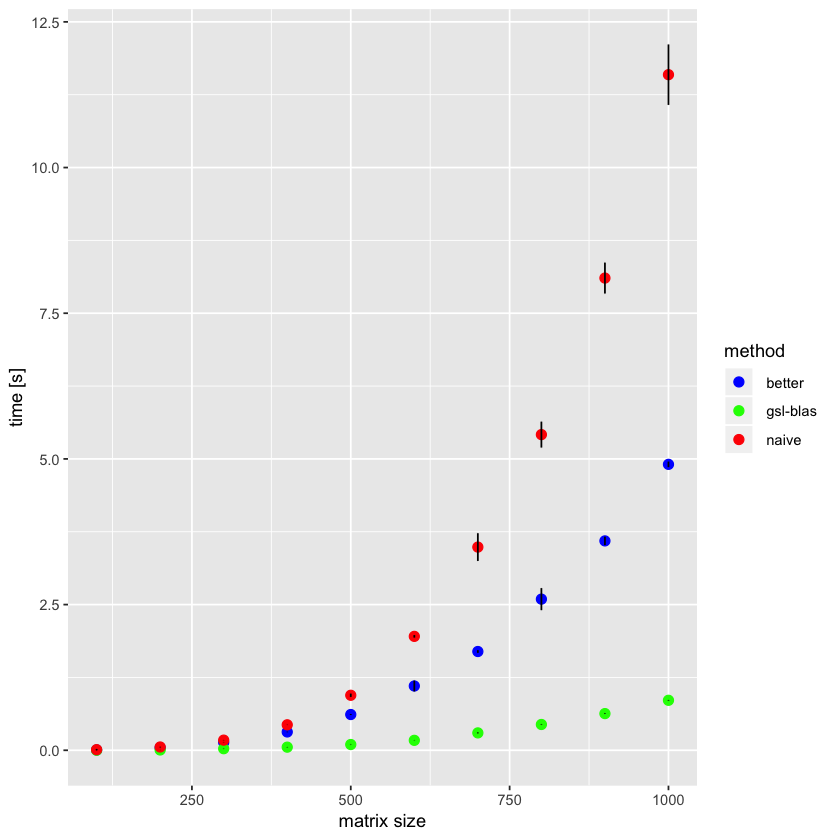

In [11]:
ggplot(df, aes(size,time)) + geom_point(aes(colour=method),size=2.5) +
  xlab("matrix size") + ylab("time [s]") +
  geom_errorbar(aes(ymin=time-sd, ymax=time+sd), width=.1) +
  scale_color_manual(values=c("blue", "green", "red"))

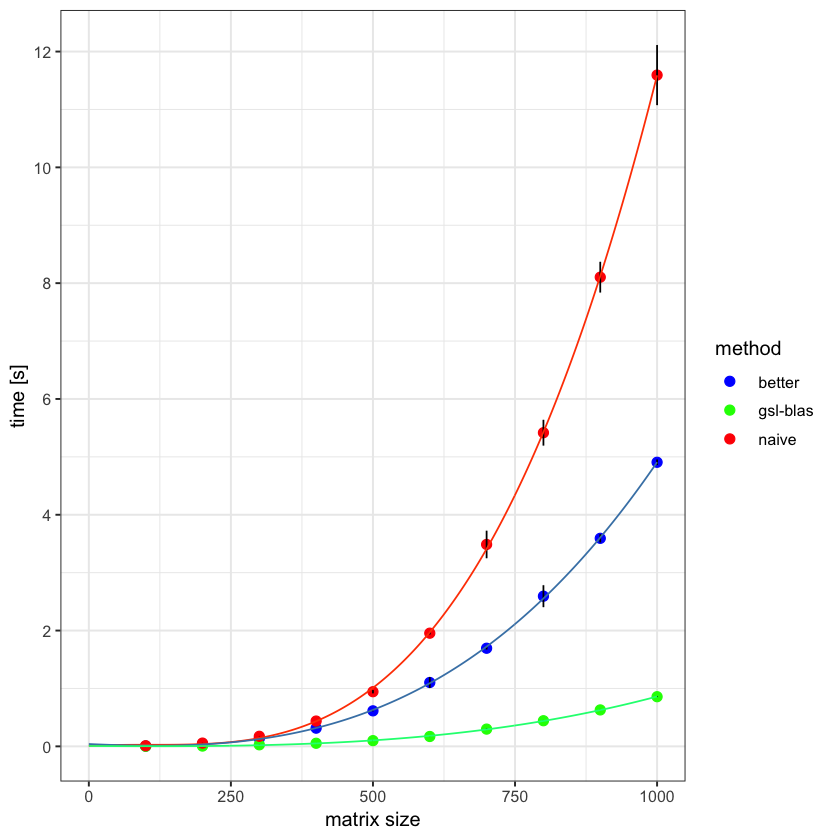

In [12]:
fit_naive = lm(time ~ poly(size, 3, raw=TRUE), data=naive)
df_naive = data.frame(size = seq(0, 1000, length.out=400))
df_naive$time = predict(fit_naive, df_naive)

fit_better = lm(time ~ poly(size, 3, raw=TRUE), data=better)
df_better = data.frame(size = seq(0, 1000, length.out=400))
df_better$time = predict(fit_better, df_better)

fit_blas = lm(time ~ poly(size, 3, raw=TRUE), data=blas)
df_blas = data.frame(size = seq(0, 1000, length.out=400))
df_blas$time = predict(fit_blas, df_blas)

last_plot() + geom_line(data=df_naive, aes(size,time), color='orangered') + 
            geom_line(data=df_better, aes(size,time), color='steelblue') + 
            geom_line(data=df_blas, aes(size,time), color='springgreen') + theme_bw(base_size = 12) +
            scale_y_continuous(breaks= seq(0, 14, 2))